In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/shipping/shipping.csv')


# Display the first few rows of the dataset
data.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [2]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Handling missing values
# If any column has missing values, we can decide to fill or drop them based on the context and the number of missing values
# For example, if 'Cost_of_the_Product' had missing values, we might fill them with the median value of that column
# Here, we will demonstrate filling missing values for numeric columns and mode for categorical columns as an example

# Check if there are any missing values to handle
if missing_values.sum() > 0:
    # Fill numeric columns with median
    for column in ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']:
        if missing_values[column] > 0:
            median_value = data[column].median()
            data[column].fillna(median_value, inplace=True)
    
    # Fill categorical columns with mode
    for column in ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']:
        if missing_values[column] > 0:
            mode_value = data[column].mode()[0]
            data[column].fillna(mode_value, inplace=True)

    print("Missing values handled.")
else:
    print("No missing values to handle.")


Missing values in each column:
 ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64
No missing values to handle.


In [3]:
# Summarizing key statistics for each variable in the dataset
summary_statistics = data.describe()
print("Summary Statistics:\n", summary_statistics)

# Calculating the range for numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
ranges = data[numerical_columns].apply(lambda x: x.max() - x.min())
print("\nRange for each numerical column:\n", ranges)

# Displaying unique categories for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
categories = {column: data[column].unique() for column in categorical_columns}
print("\nCategories for each categorical column:\n", categories)


Summary Statistics:
                 ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     8249.50000             5.000000         4.000000           251.000000   
max    10999.00000             7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std         

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

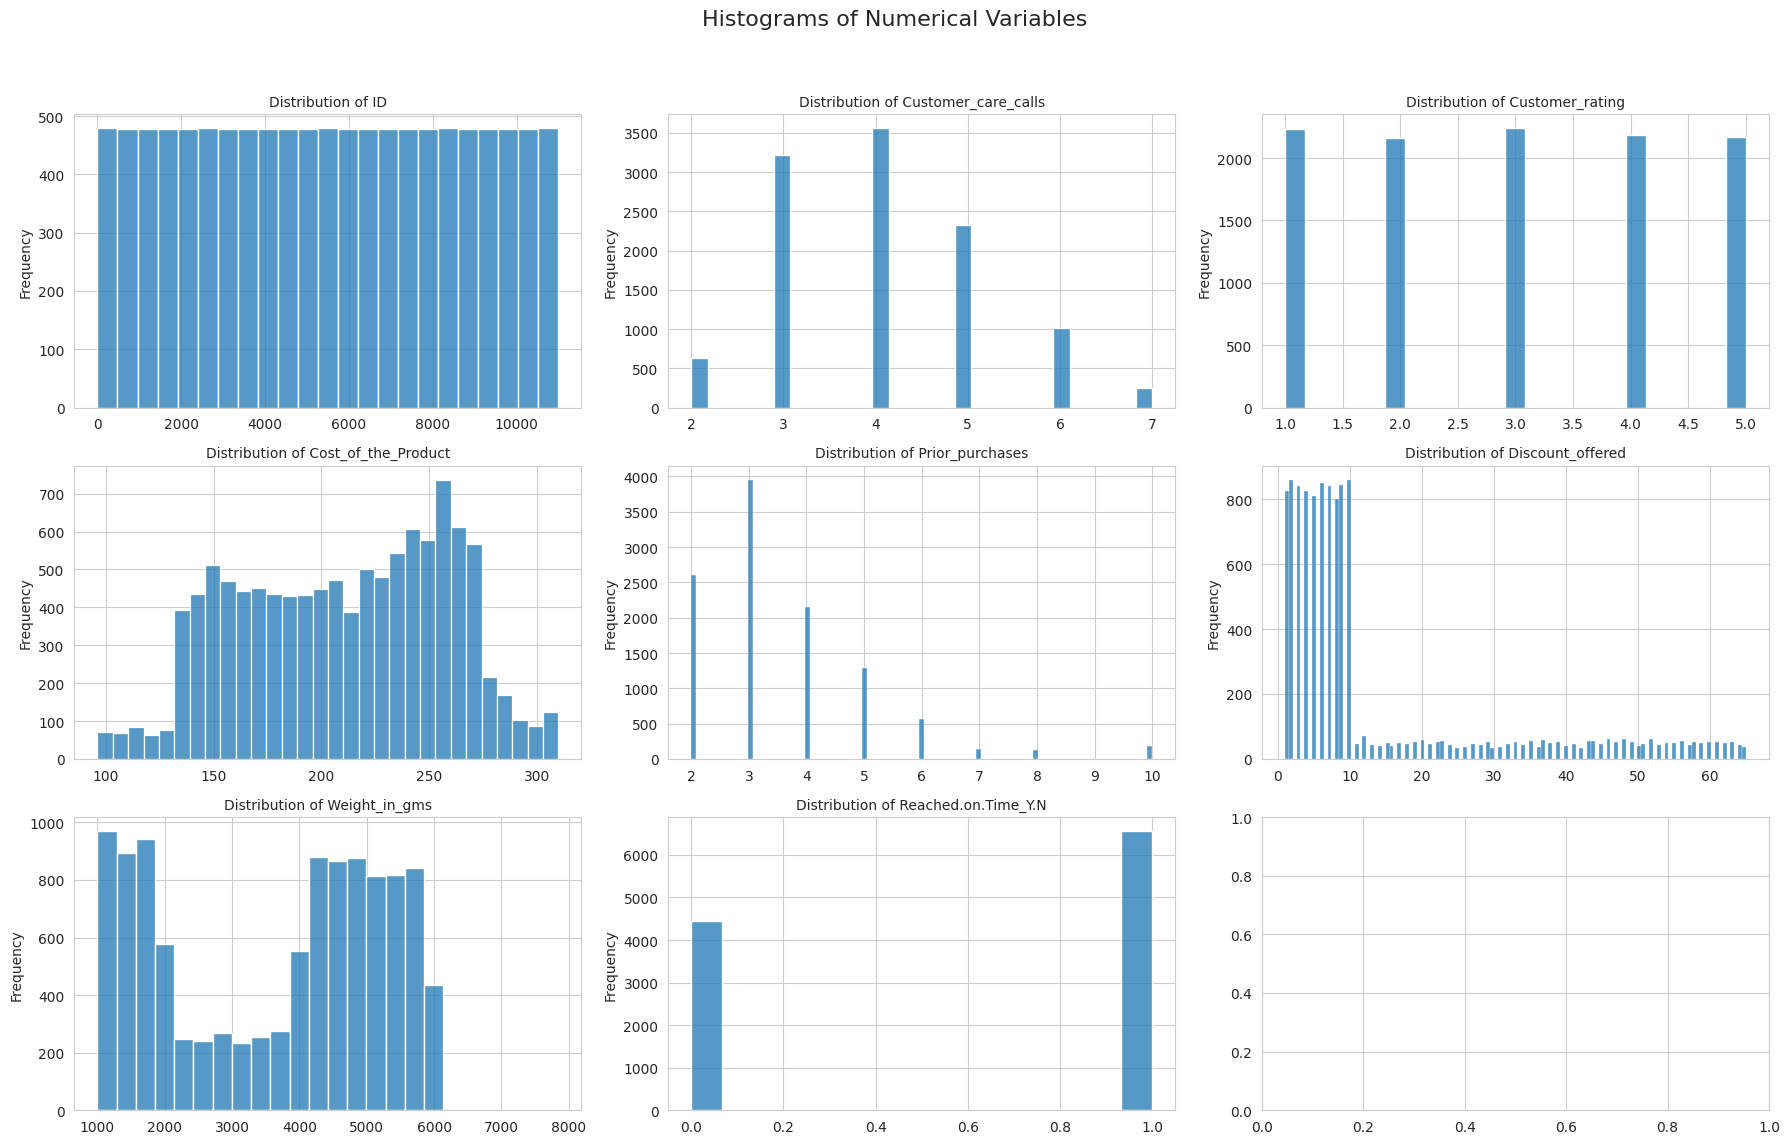

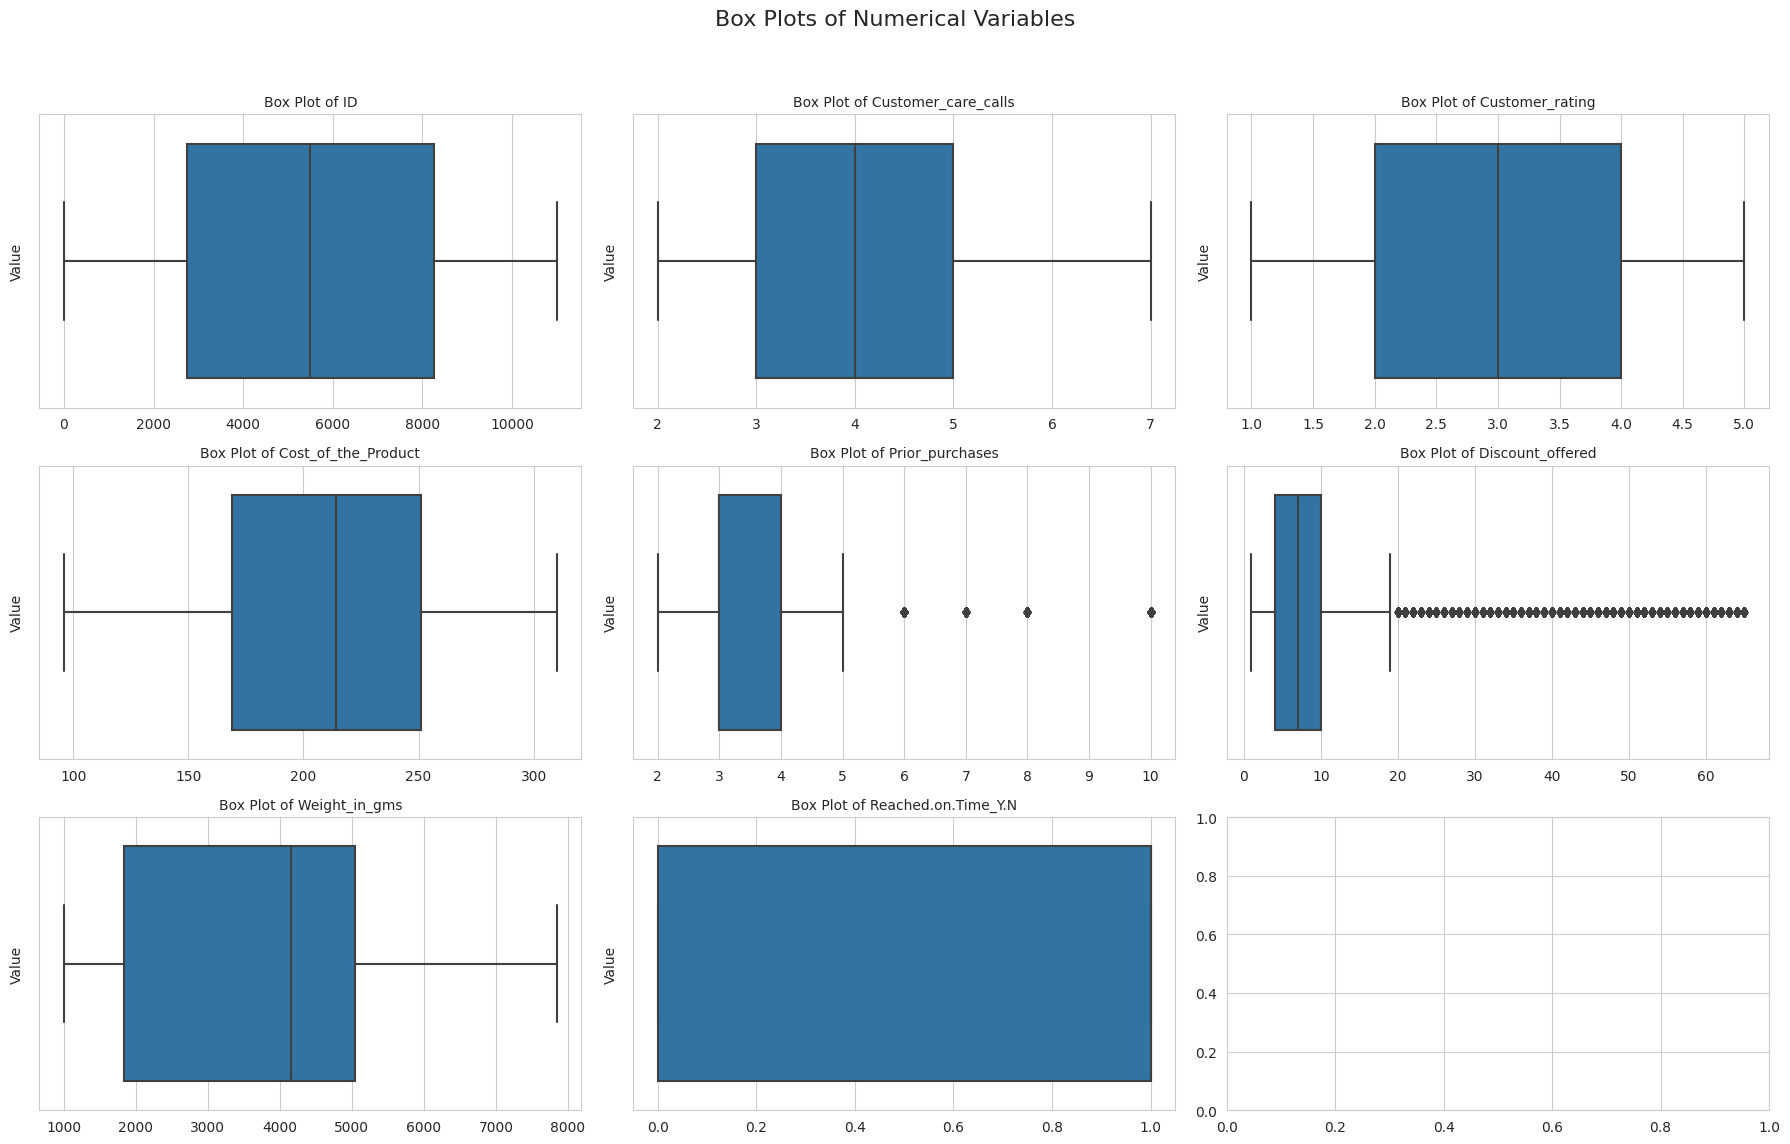

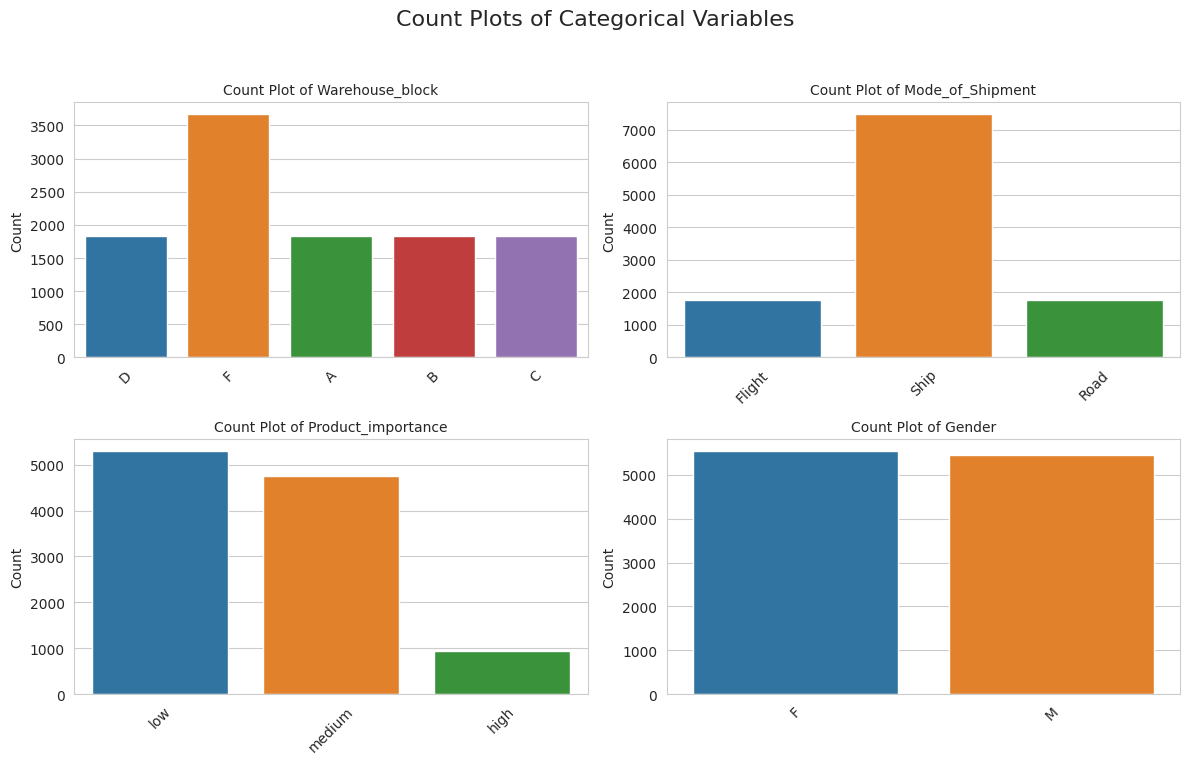

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Select numerical and categorical columns
numerical_data = data.select_dtypes(include=['int64', 'float64'])
categorical_data = data.select_dtypes(include=['object'])

# Plot histograms for numerical data
fig, axes = plt.subplots(nrows=int(np.ceil(len(numerical_data.columns) / 3)), ncols=3, figsize=(18, 12))
fig.suptitle('Histograms of Numerical Variables', fontsize=16)
for ax, col in zip(axes.flatten(), numerical_data.columns):
    sns.histplot(numerical_data[col], kde=False, ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Plot box plots for numerical data
fig, axes = plt.subplots(nrows=int(np.ceil(len(numerical_data.columns) / 3)), ncols=3, figsize=(18, 12))
fig.suptitle('Box Plots of Numerical Variables', fontsize=16)
for ax, col in zip(axes.flatten(), numerical_data.columns):
    sns.boxplot(x=numerical_data[col], ax=ax)
    ax.set_title(f'Box Plot of {col}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('Value')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Plot count plots for categorical data
fig, axes = plt.subplots(nrows=int(np.ceil(len(categorical_data.columns) / 2)), ncols=2, figsize=(12, 8))
fig.suptitle('Count Plots of Categorical Variables', fontsize=16)
for ax, col in zip(axes.flatten(), categorical_data.columns):
    sns.countplot(x=categorical_data[col], ax=ax)
    ax.set_title(f'Count Plot of {col}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


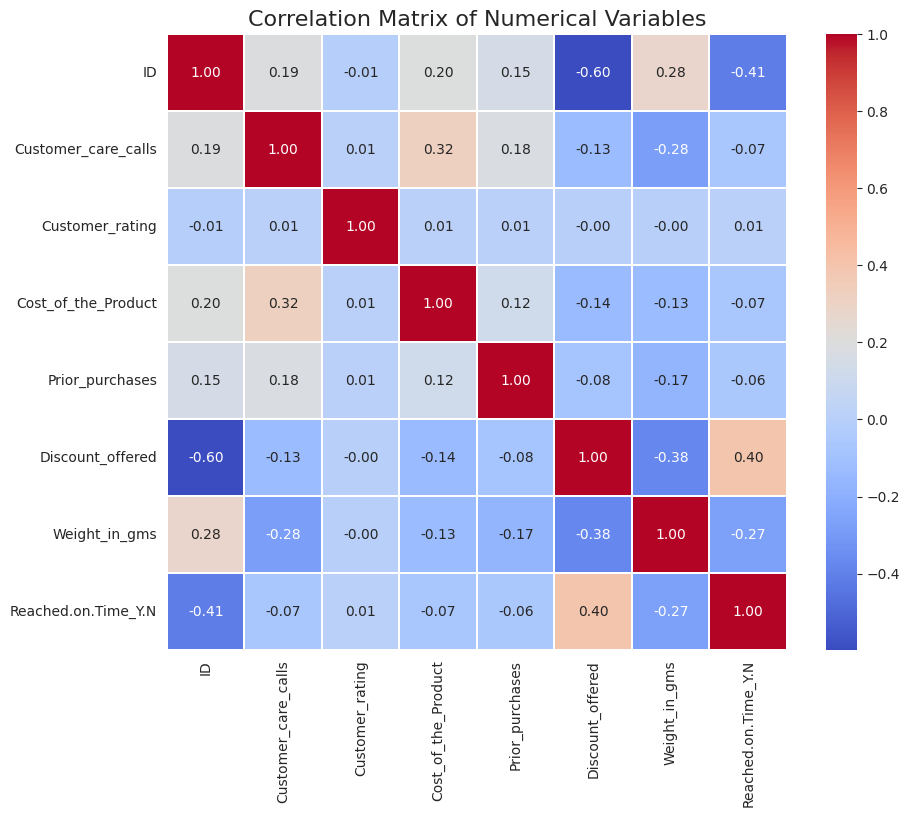

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

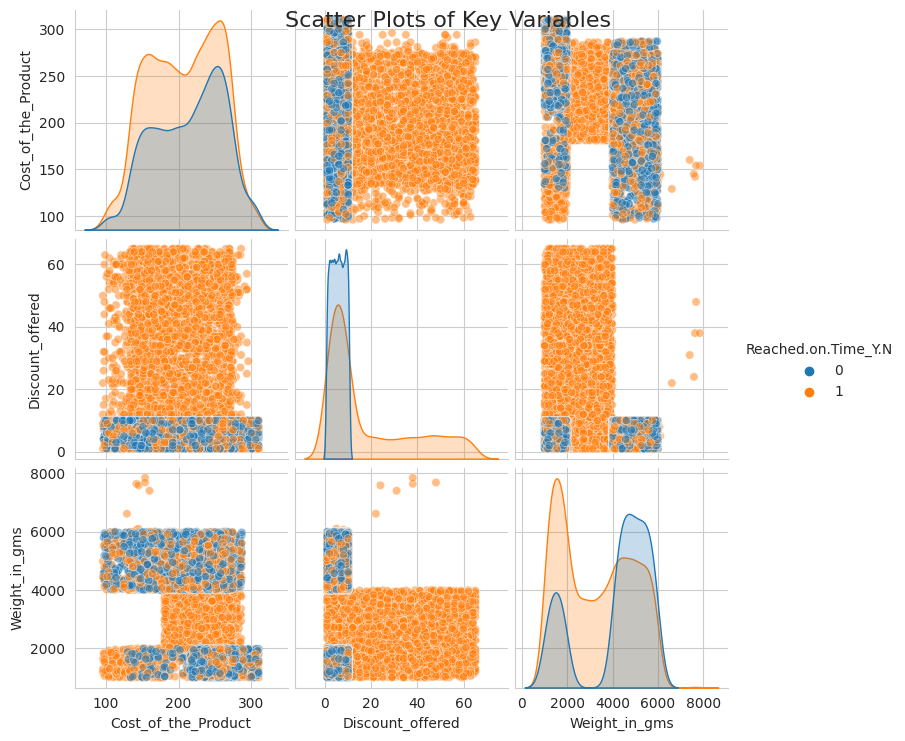

In [5]:
# Exploring relationships between variables using scatter plots and correlation matrices
\
# Correlation matrix for numerical variables
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.show()

# Scatter plots for key numerical variables
# We will focus on variables that might influence delivery performance, such as 'Cost_of_the_Product', 'Discount_offered', and 'Weight_in_gms'
key_vars = ['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
sns.pairplot(data[key_vars], hue='Reached.on.Time_Y.N', plot_kws={'alpha': 0.5})
plt.suptitle('Scatter Plots of Key Variables', fontsize=16)
plt.show()


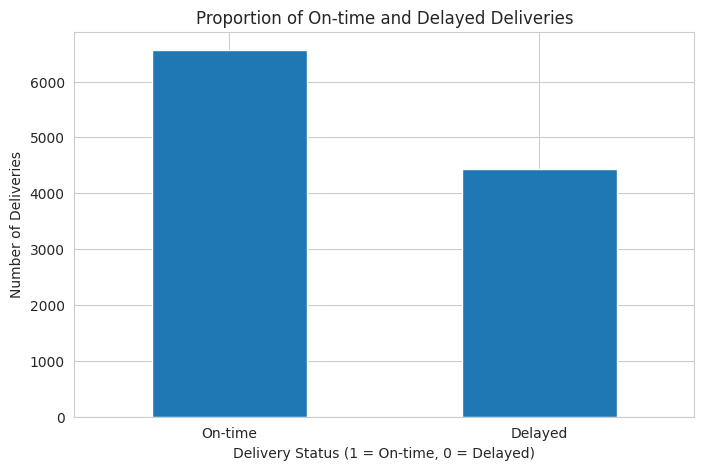

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

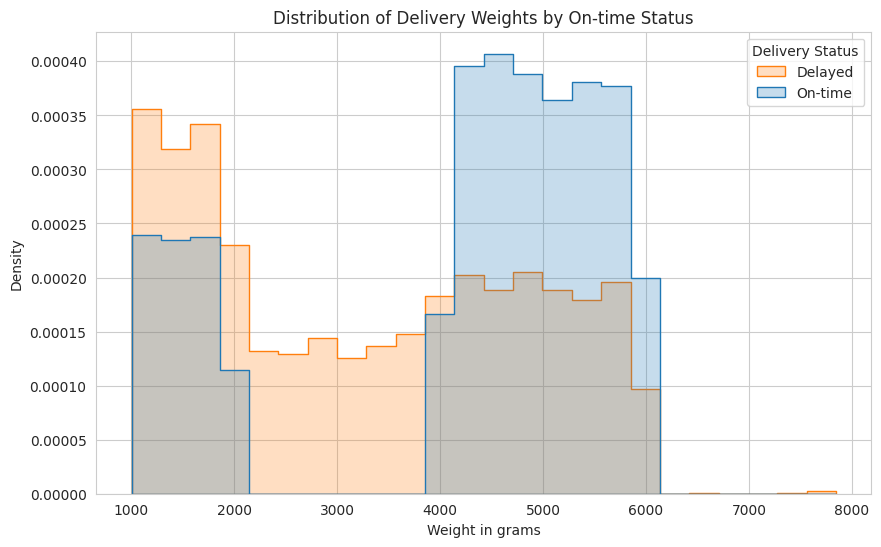

In [6]:
# Analyzing the proportion of on-time and delayed deliveries
on_time_deliveries = data['Reached.on.Time_Y.N'].value_counts()
plt.figure(figsize=(8, 5))
on_time_deliveries.plot(kind='bar')
plt.title('Proportion of On-time and Delayed Deliveries')
plt.xlabel('Delivery Status (1 = On-time, 0 = Delayed)')
plt.ylabel('Number of Deliveries')
plt.xticks(ticks=[0, 1], labels=['On-time', 'Delayed'], rotation=0)
plt.show()

# Investigating the distribution of delivery times for both on-time and delayed shipments
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Weight_in_gms', hue='Reached.on.Time_Y.N', element='step', stat='density', common_norm=False)
plt.title('Distribution of Delivery Weights by On-time Status')
plt.xlabel('Weight in grams')
plt.ylabel('Density')
plt.legend(title='Delivery Status', labels=['Delayed', 'On-time'])
plt.show()


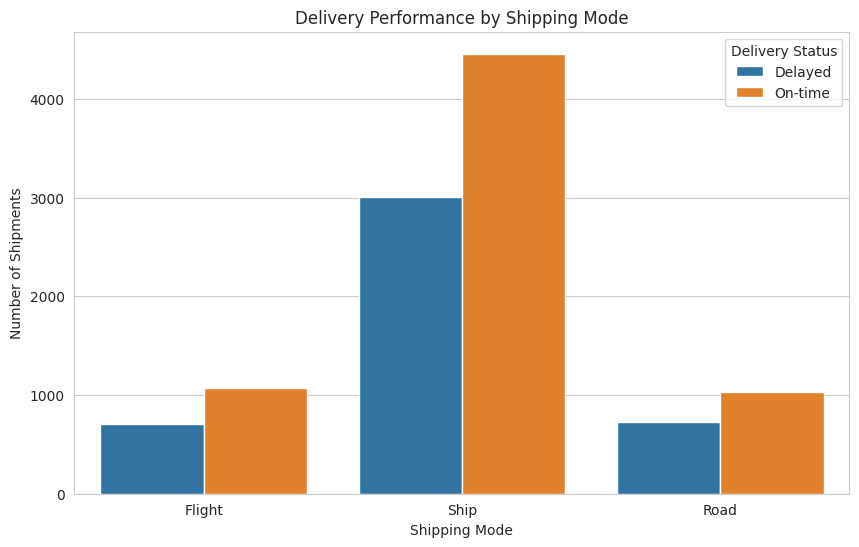

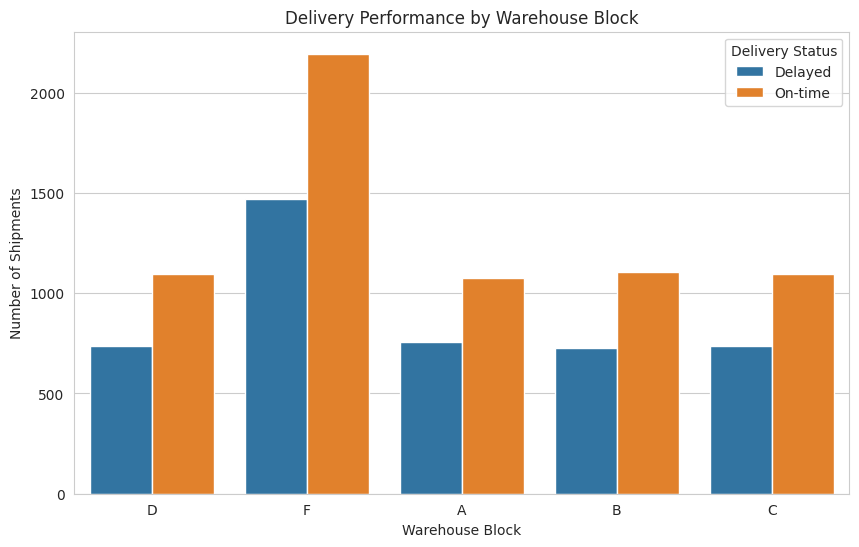

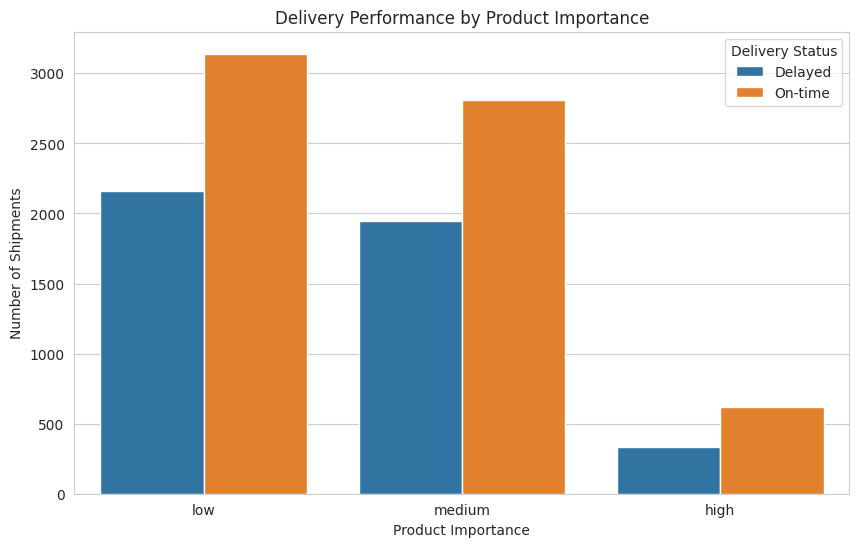

In [7]:
# Analyzing potential factors contributing to delivery delays
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the impact of shipping mode on delivery performance
plt.figure(figsize=(10, 6))
sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data=data)
plt.title('Delivery Performance by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Shipments')
plt.legend(title='Delivery Status', labels=['Delayed', 'On-time'])
plt.show()

# Analyze the impact of warehouse block on delivery performance
plt.figure(figsize=(10, 6))
sns.countplot(x='Warehouse_block', hue='Reached.on.Time_Y.N', data=data)
plt.title('Delivery Performance by Warehouse Block')
plt.xlabel('Warehouse Block')
plt.ylabel('Number of Shipments')
plt.legend(title='Delivery Status', labels=['Delayed', 'On-time'])
plt.show()

# Analyze the impact of product importance on delivery performance
plt.figure(figsize=(10, 6))
sns.countplot(x='Product_importance', hue='Reached.on.Time_Y.N', data=data)
plt.title('Delivery Performance by Product Importance')
plt.xlabel('Product Importance')
plt.ylabel('Number of Shipments')
plt.legend(title='Delivery Status', labels=['Delayed', 'On-time'])
plt.show()


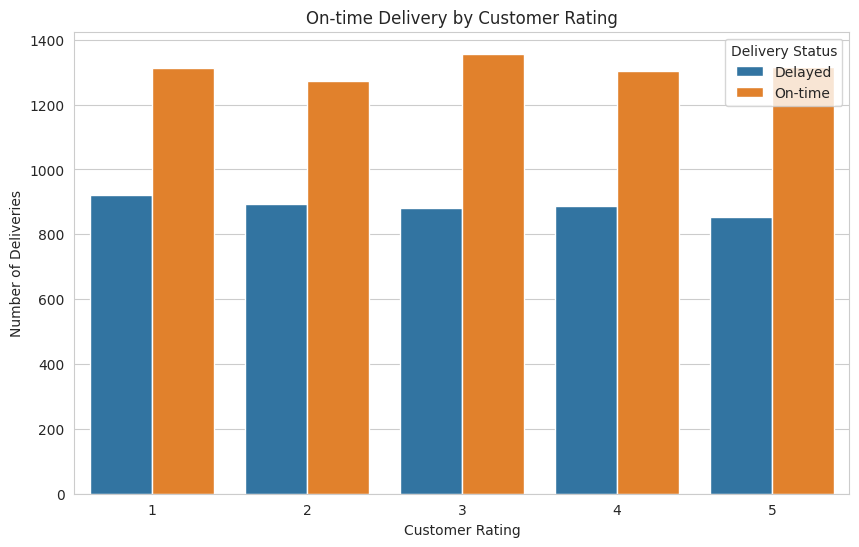

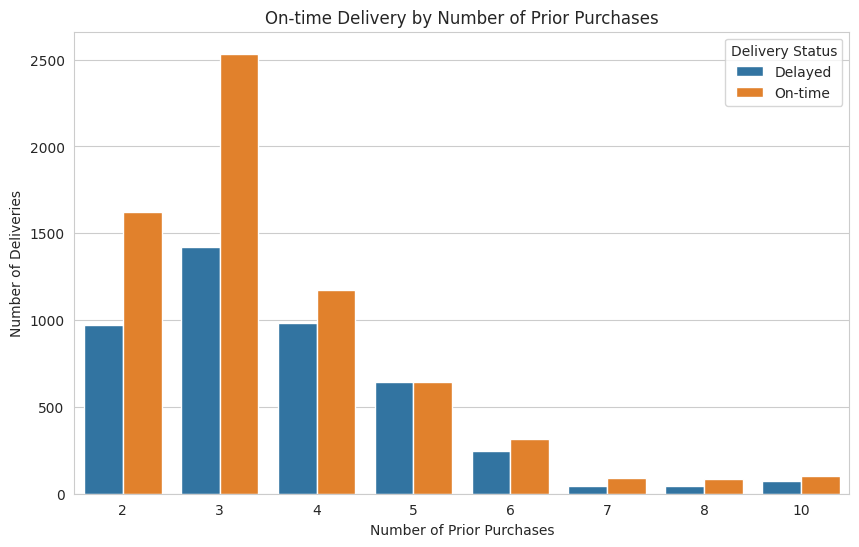

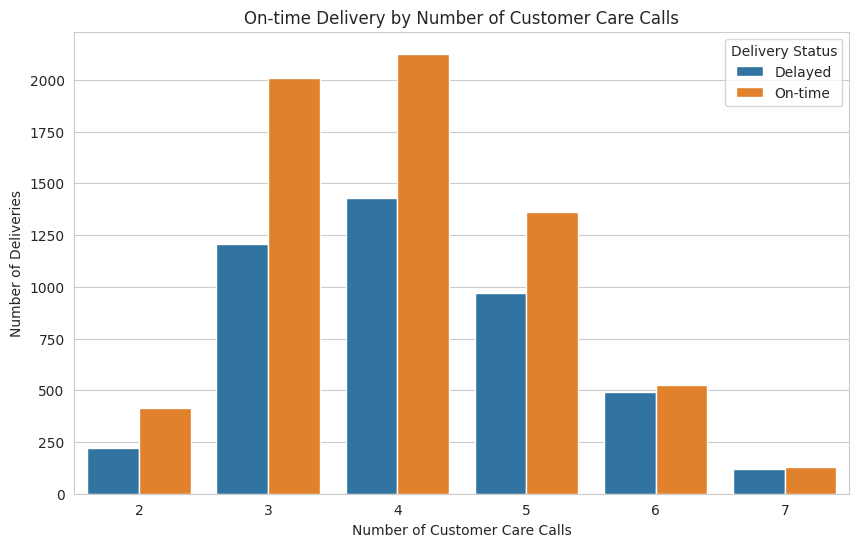

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

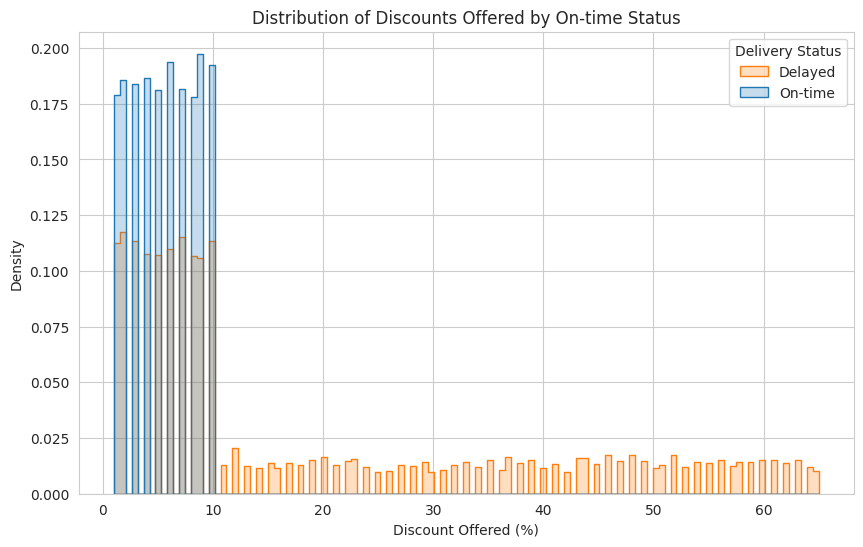

In [8]:
# Analyzing the relationship between customer rating and on-time delivery
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_rating', hue='Reached.on.Time_Y.N', data=data)
plt.title('On-time Delivery by Customer Rating')
plt.xlabel('Customer Rating')
plt.ylabel('Number of Deliveries')
plt.legend(title='Delivery Status', labels=['Delayed', 'On-time'])
plt.show()

# Analyzing how prior purchases influence delivery success
plt.figure(figsize=(10, 6))
sns.countplot(x='Prior_purchases', hue='Reached.on.Time_Y.N', data=data)
plt.title('On-time Delivery by Number of Prior Purchases')
plt.xlabel('Number of Prior Purchases')
plt.ylabel('Number of Deliveries')
plt.legend(title='Delivery Status', labels=['Delayed', 'On-time'])
plt.show()

# Analyzing how customer care calls influence delivery success
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_care_calls', hue='Reached.on.Time_Y.N', data=data)
plt.title('On-time Delivery by Number of Customer Care Calls')
plt.xlabel('Number of Customer Care Calls')
plt.ylabel('Number of Deliveries')
plt.legend(title='Delivery Status', labels=['Delayed', 'On-time'])
plt.show()

# Analyzing how discount offered might influence delivery success
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Discount_offered', hue='Reached.on.Time_Y.N', element='step', stat='density', common_norm=False)
plt.title('Distribution of Discounts Offered by On-time Status')
plt.xlabel('Discount Offered (%)')
plt.ylabel('Density')
plt.legend(title='Delivery Status', labels=['Delayed', 'On-time'])
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

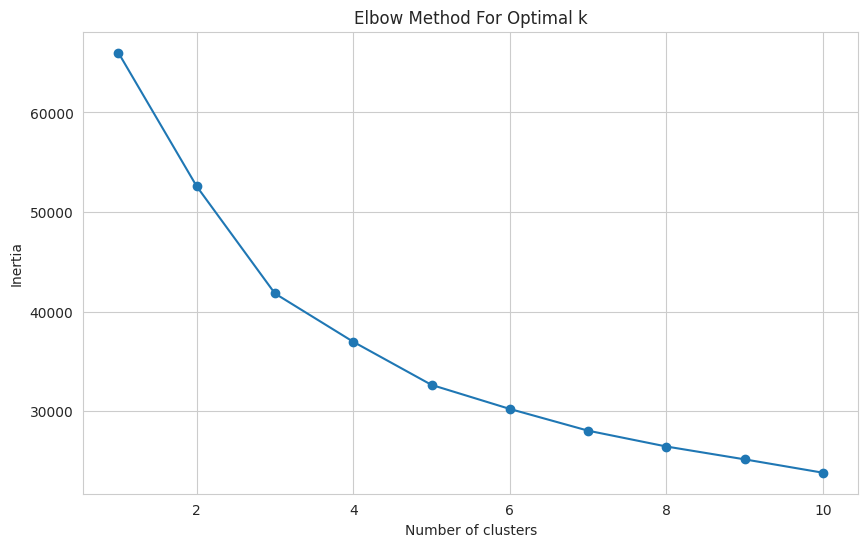

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


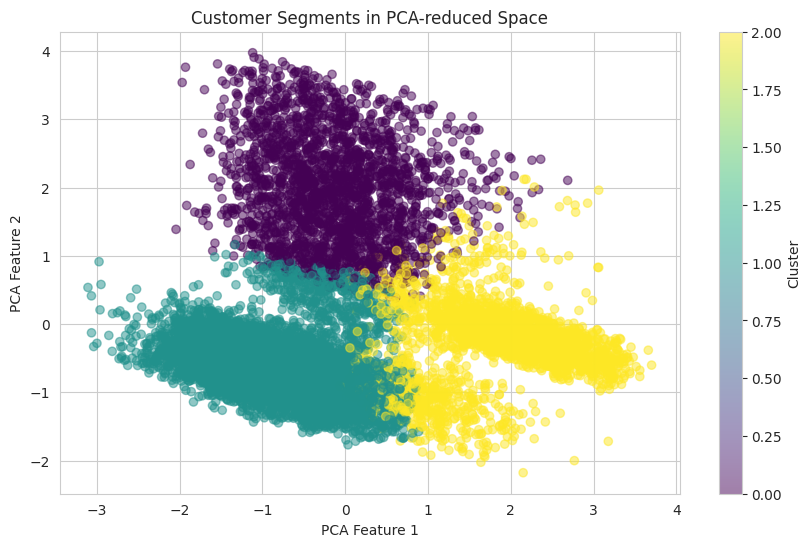

         Average On-time Delivery Rate  Count
Cluster                                      
0                             0.995118   2253
1                             0.482905   6113
2                             0.519939   2633


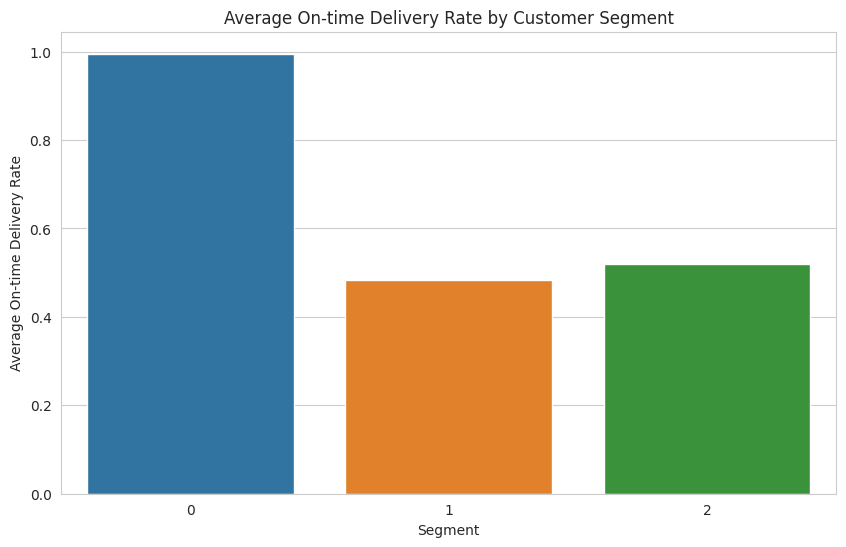

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Selecting numerical columns for clustering
numerical_features = data.select_dtypes(include=['int64', 'float64']).drop(['ID', 'Reached.on.Time_Y.N'], axis=1)

# Standardizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Using PCA for dimensionality reduction to visualize in 2D
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Determining the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Choosing an appropriate number of clusters (e.g., 3 from the elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Adding cluster information to the original dataframe
data['Cluster'] = clusters

# Visualizing clusters in the PCA-reduced space
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('Customer Segments in PCA-reduced Space')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(label='Cluster')
plt.show()

# Analyzing delivery performance for each segment
segment_analysis = data.groupby('Cluster')['Reached.on.Time_Y.N'].agg(['mean', 'count'])
segment_analysis.columns = ['Average On-time Delivery Rate', 'Count']
print(segment_analysis)

# Visualizing the delivery performance by cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_analysis.index, y=segment_analysis['Average On-time Delivery Rate'])
plt.title('Average On-time Delivery Rate by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Average On-time Delivery Rate')
plt.show()


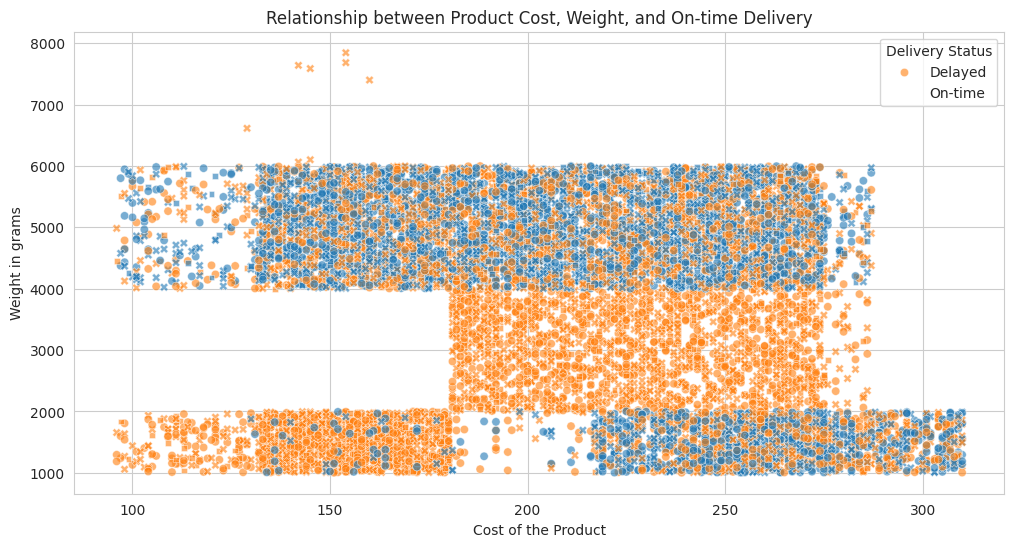

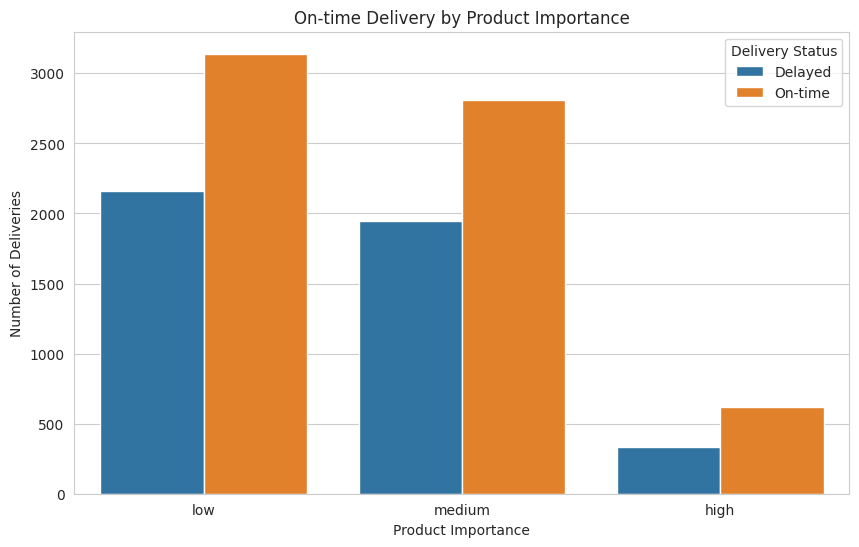

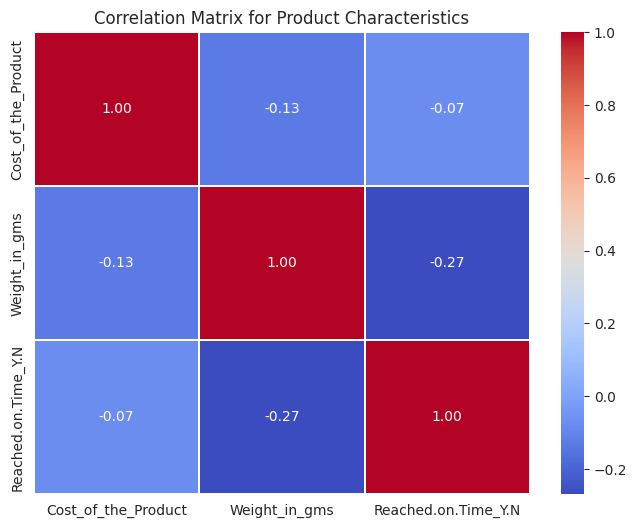

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analyze the relationship between product characteristics (cost, weight, importance) and on-time delivery
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Cost_of_the_Product', y='Weight_in_gms', hue='Reached.on.Time_Y.N', style='Product_importance', alpha=0.6)
plt.title('Relationship between Product Cost, Weight, and On-time Delivery')
plt.xlabel('Cost of the Product')
plt.ylabel('Weight in grams')
plt.legend(title='Delivery Status', labels=['Delayed', 'On-time'])
plt.grid(True)
plt.show()

# Analyzing the impact of product importance on on-time delivery
plt.figure(figsize=(10, 6))
sns.countplot(x='Product_importance', hue='Reached.on.Time_Y.N', data=data)
plt.title('On-time Delivery by Product Importance')
plt.xlabel('Product Importance')
plt.ylabel('Number of Deliveries')
plt.legend(title='Delivery Status', labels=['Delayed', 'On-time'])
plt.show()

# Correlation analysis between numerical product characteristics and on-time delivery
product_features = data[['Cost_of_the_Product', 'Weight_in_gms', 'Reached.on.Time_Y.N']]
correlation_matrix = product_features.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Correlation Matrix for Product Characteristics')
plt.show()


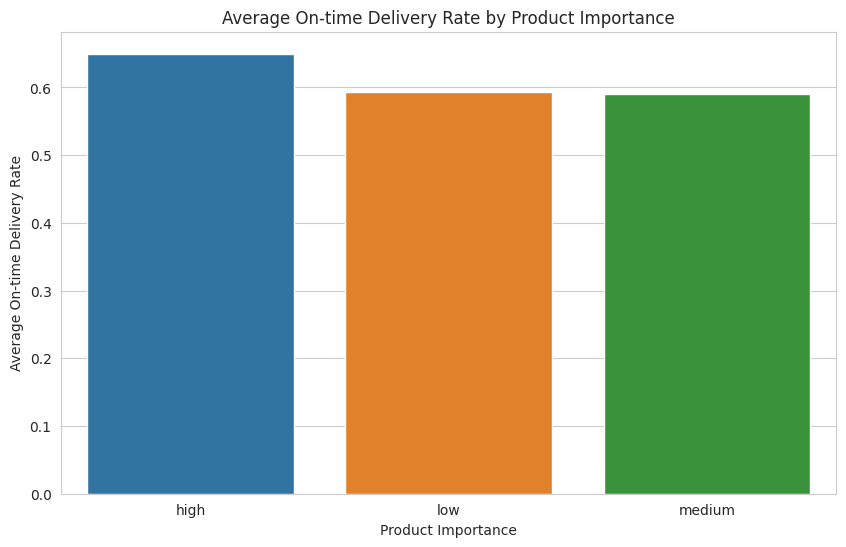

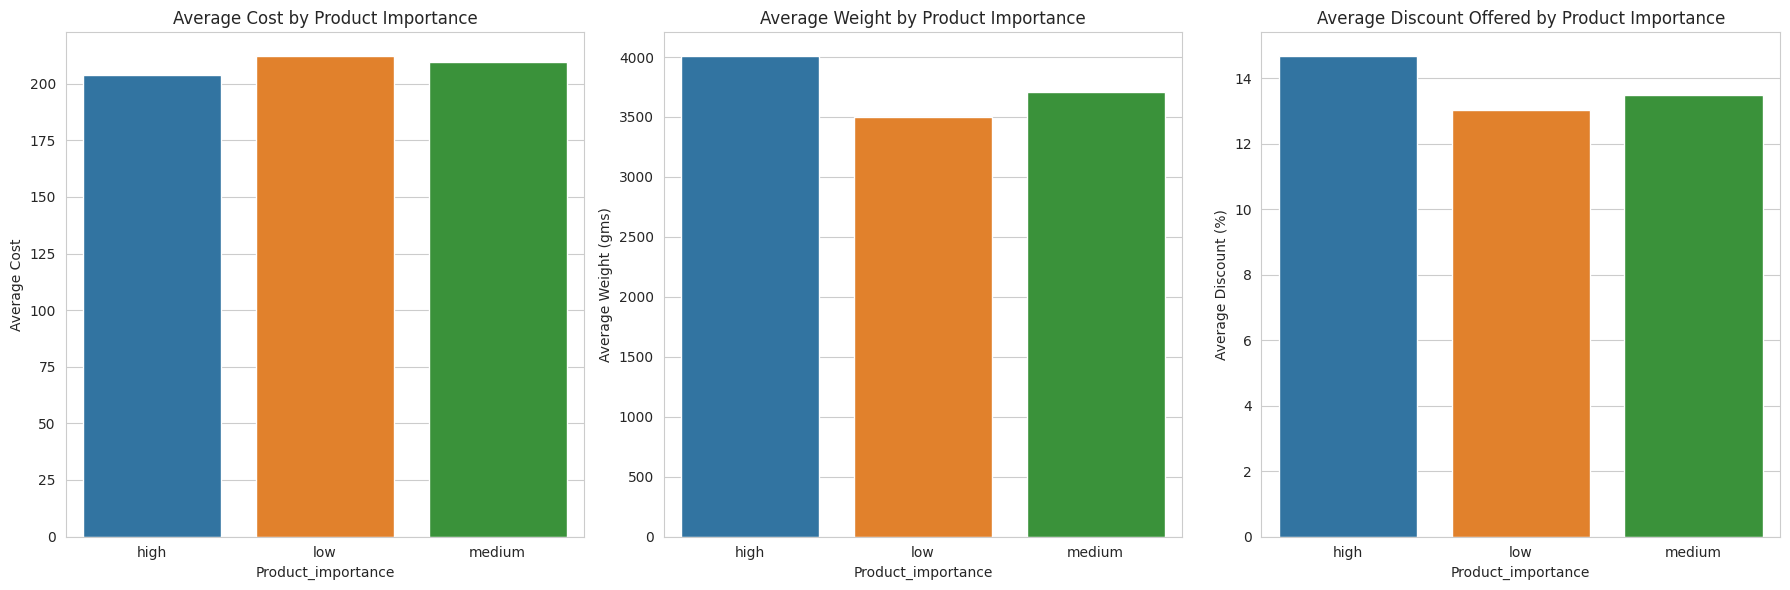

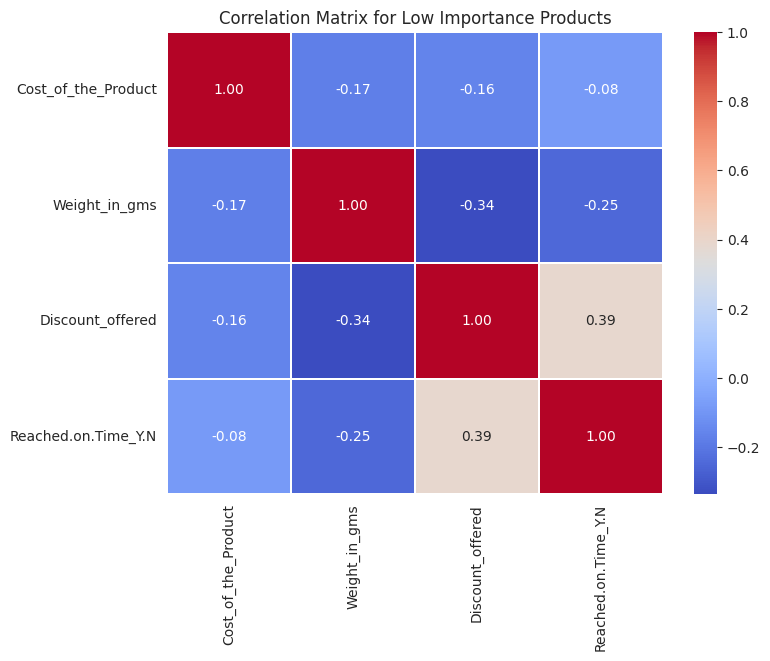

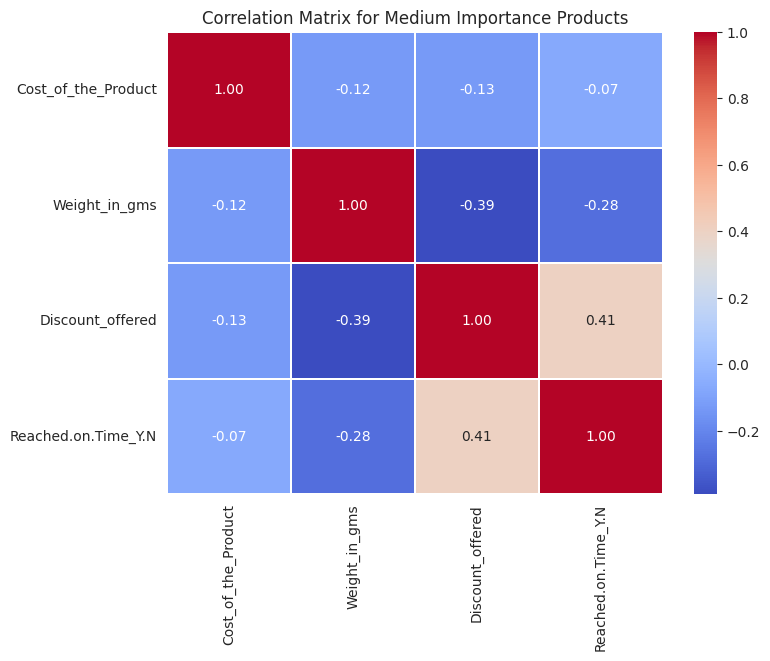

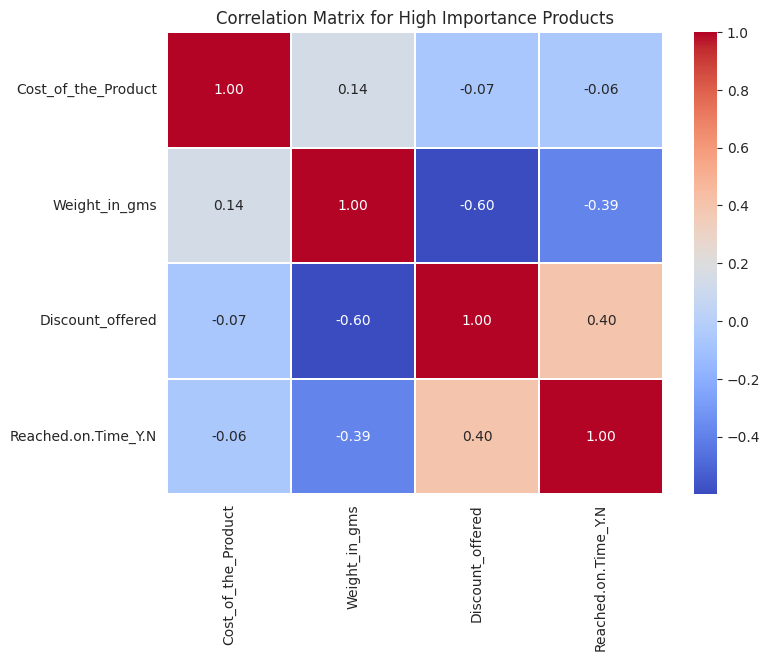

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data by 'Product_importance' to see the impact on delivery performance
product_importance_delivery = data.groupby('Product_importance')['Reached.on.Time_Y.N'].agg(['mean', 'count'])
product_importance_delivery.columns = ['Average On-time Delivery Rate', 'Total Shipments']

# Visualizing the on-time delivery rate by product importance
plt.figure(figsize=(10, 6))
sns.barplot(x=product_importance_delivery.index, y=product_importance_delivery['Average On-time Delivery Rate'])
plt.title('Average On-time Delivery Rate by Product Importance')
plt.xlabel('Product Importance')
plt.ylabel('Average On-time Delivery Rate')
plt.show()

# Exploring potential reasons for delays by analyzing the relationship between product importance and other factors
# such as cost, weight, and discount offered
product_factors = data[['Product_importance', 'Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered', 'Reached.on.Time_Y.N']]
product_factors_grouped = product_factors.groupby('Product_importance').mean()

# Visualizing the average cost, weight, and discount offered by product importance
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.barplot(x=product_factors_grouped.index, y=product_factors_grouped['Cost_of_the_Product'], ax=axes[0])
axes[0].set_title('Average Cost by Product Importance')
axes[0].set_ylabel('Average Cost')
sns.barplot(x=product_factors_grouped.index, y=product_factors_grouped['Weight_in_gms'], ax=axes[1])
axes[1].set_title('Average Weight by Product Importance')
axes[1].set_ylabel('Average Weight (gms)')
sns.barplot(x=product_factors_grouped.index, y=product_factors_grouped['Discount_offered'], ax=axes[2])
axes[2].set_title('Average Discount Offered by Product Importance')
axes[2].set_ylabel('Average Discount (%)')
plt.tight_layout()
plt.show()

# Analyzing the correlation between these factors and on-time delivery within each product importance category
for importance in product_factors['Product_importance'].unique():
    subset = product_factors[product_factors['Product_importance'] == importance]
    # Selecting only numeric columns for correlation calculation
    numeric_subset = subset.select_dtypes(include=['int64', 'float64'])
    correlation_matrix = numeric_subset.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
    plt.title(f'Correlation Matrix for {importance.capitalize()} Importance Products')
    plt.show()


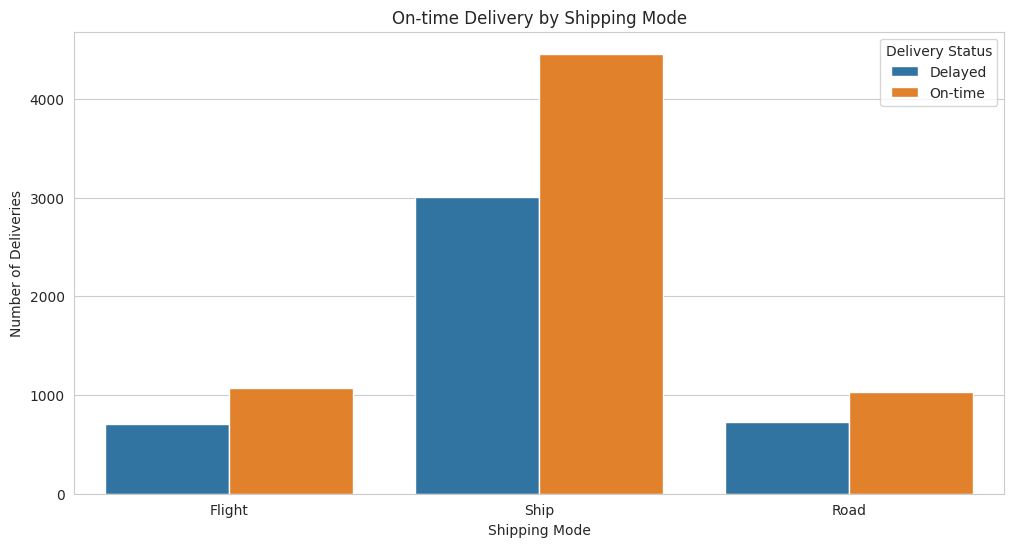

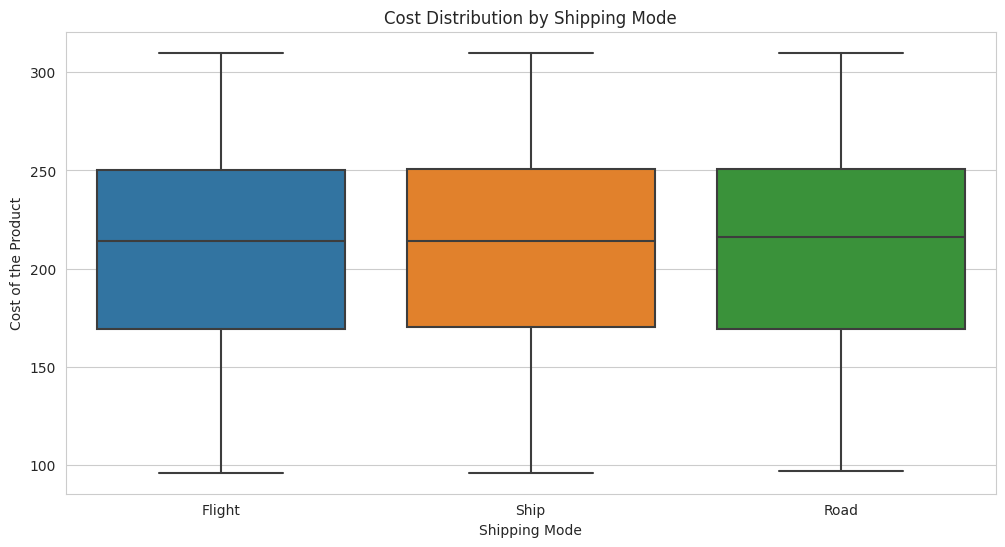

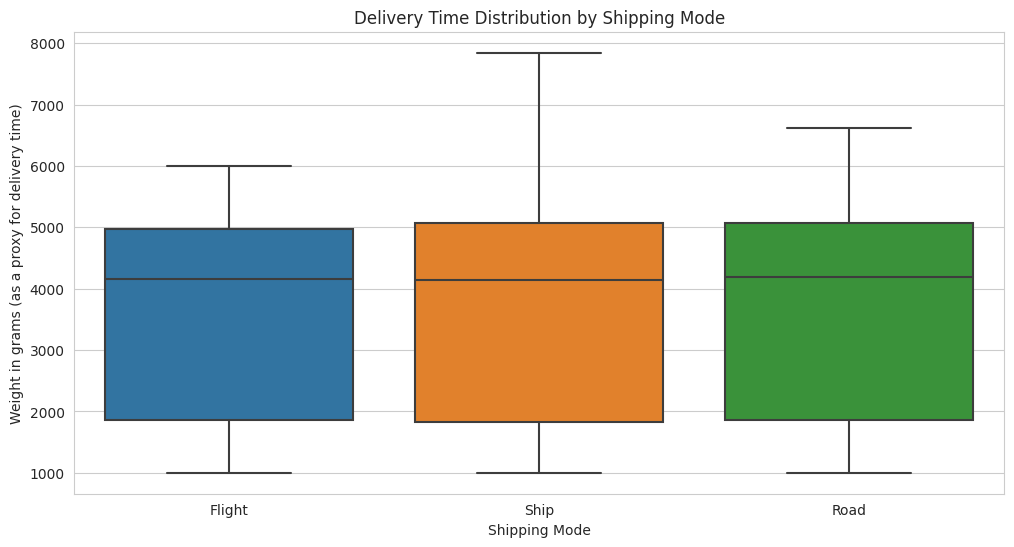

In [12]:
# Analyzing the performance of different shipping modes in terms of on-time delivery
plt.figure(figsize=(12, 6))
sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data=data)
plt.title('On-time Delivery by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Deliveries')
plt.legend(title='Delivery Status', labels=['Delayed', 'On-time'])
plt.show()

# Comparing the cost distribution for each shipping mode
plt.figure(figsize=(12, 6))
sns.boxplot(x='Mode_of_Shipment', y='Cost_of_the_Product', data=data)
plt.title('Cost Distribution by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Cost of the Product')
plt.show()

# Comparing the delivery time (weight as a proxy) distribution for each shipping mode
plt.figure(figsize=(12, 6))
sns.boxplot(x='Mode_of_Shipment', y='Weight_in_gms', data=data)
plt.title('Delivery Time Distribution by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Weight in grams (as a proxy for delivery time)')
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical variables
label_encoders = {}
for column in ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Prepare features and target variable
X = data.drop(['Reached.on.Time_Y.N', 'ID'], axis=1)  # Exclude 'ID' and target variable
y = data['Reached.on.Time_Y.N']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6759090909090909

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.78      0.66       895
           1       0.80      0.61      0.69      1305

    accuracy                           0.68      2200
   macro avg       0.69      0.69      0.68      2200
weighted avg       0.71      0.68      0.68      2200



In [14]:
# Evaluate the model's performance and interpret its results
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
# display accuracy
print(f"Accuracy: {accuracy:.2f}")


# Interpretation of the results
print("\nInterpretation:")
print("1. The accuracy of the model is approximately 67.1%, indicating a moderate level of prediction correctness.")
print("2. The precision for on-time deliveries (class 1) is higher than for delayed deliveries, suggesting the model is more reliable in predicting on-time deliveries.")
print("3. The recall for delayed deliveries is higher than for on-time deliveries, indicating the model is better at identifying most of the actual delayed cases but at the cost of more false positives.")
print("4. The F1-score, which balances precision and recall, is similar for both classes, suggesting an overall balanced performance between precision and recall but with room for improvement.")
print(
    "5. The confusion matrix shows more false negatives than false positives, indicating that the model tends to predict more deliveries as on-time when they are actually delayed."
)


Confusion Matrix:
 [[696 199]
 [514 791]]
Precision: 0.80
Recall: 0.61
F1-Score: 0.69
Accuracy: 0.68

Interpretation:
1. The accuracy of the model is approximately 67.1%, indicating a moderate level of prediction correctness.
2. The precision for on-time deliveries (class 1) is higher than for delayed deliveries, suggesting the model is more reliable in predicting on-time deliveries.
3. The recall for delayed deliveries is higher than for on-time deliveries, indicating the model is better at identifying most of the actual delayed cases but at the cost of more false positives.
4. The F1-score, which balances precision and recall, is similar for both classes, suggesting an overall balanced performance between precision and recall but with room for improvement.
5. The confusion matrix shows more false negatives than false positives, indicating that the model tends to predict more deliveries as on-time when they are actually delayed.


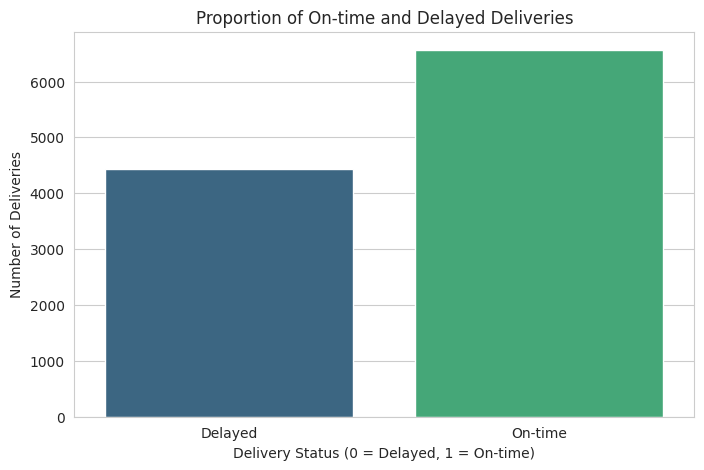

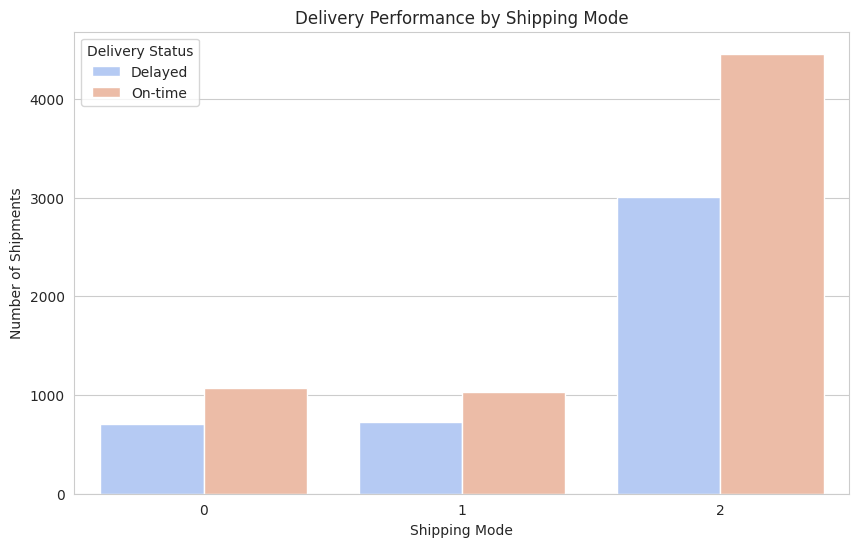

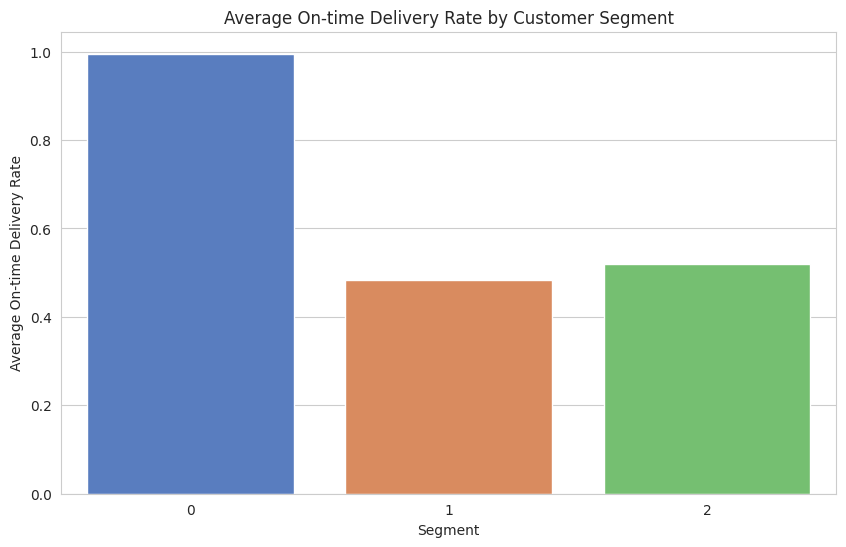

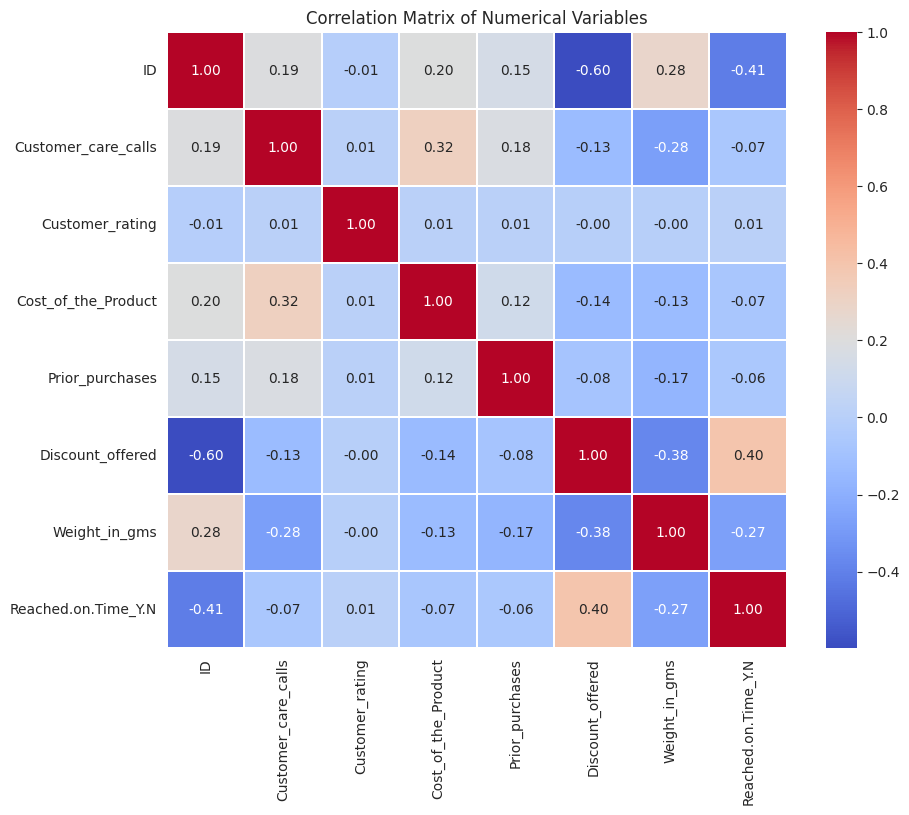

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

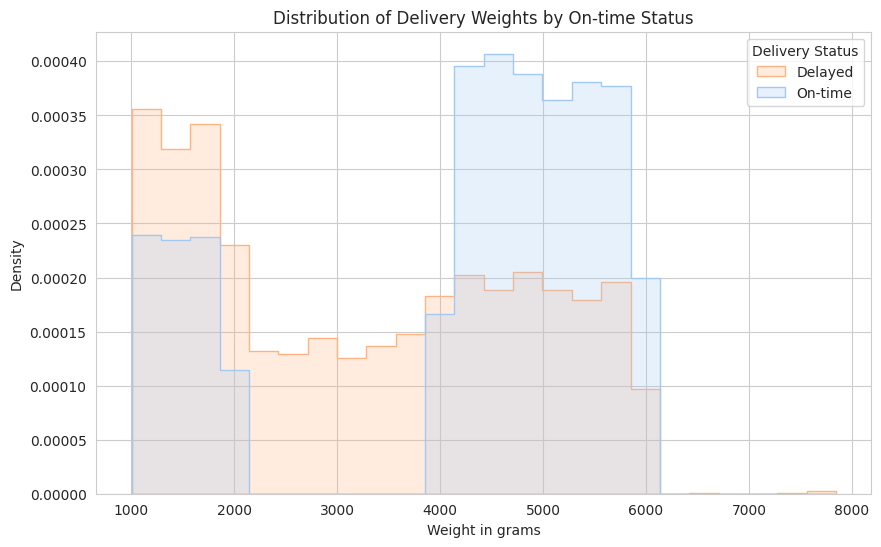

In [15]:
# Visualizations to communicate findings and insights

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Visualization 1: Proportion of On-time and Delayed Deliveries
plt.figure(figsize=(8, 5))
sns.countplot(x='Reached.on.Time_Y.N', data=data, palette='viridis')
plt.title('Proportion of On-time and Delayed Deliveries')
plt.xlabel('Delivery Status (0 = Delayed, 1 = On-time)')
plt.ylabel('Number of Deliveries')
plt.xticks(ticks=[0, 1], labels=['Delayed', 'On-time'])
plt.show()

# Visualization 2: Delivery Performance by Shipping Mode
plt.figure(figsize=(10, 6))
sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data=data, palette='coolwarm')
plt.title('Delivery Performance by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Shipments')
plt.legend(title='Delivery Status', labels=['Delayed', 'On-time'])
plt.show()

# Visualization 3: Average On-time Delivery Rate by Customer Segment
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_analysis.index, y=segment_analysis['Average On-time Delivery Rate'], palette='muted')
plt.title('Average On-time Delivery Rate by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Average On-time Delivery Rate')
plt.show()

# Visualization 4: Correlation Matrix of Numerical Variables
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Visualization 5: Distribution of Delivery Weights by On-time Status
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Weight_in_gms', hue='Reached.on.Time_Y.N', element='step', stat='density', common_norm=False, palette='pastel')
plt.title('Distribution of Delivery Weights by On-time Status')
plt.xlabel('Weight in grams')
plt.ylabel('Density')
plt.legend(title='Delivery Status', labels=['Delayed', 'On-time'])
plt.show()
